<a href="https://colab.research.google.com/github/RafsanJany-44/ARC_Machine/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
dataset=pd.read_csv("/content/drive/MyDrive/Iqram Sir/Tinnitus_ALR_features_130.csv")

In [28]:
X = dataset.iloc[:, 3:]
y = dataset.iloc[:, 0]

In [29]:
# Split the X and Y Dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [30]:
# Perform Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
print("The best degree:")
best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)

The best degree:
poly


In [32]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
N=['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
scores={}
scores_list = []
for k in N:
  classifier = SVC(kernel = k, random_state = 0,degree=1)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(k+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))

linear round completed......................... Accurecy: 0.6730769230769231
poly round completed......................... Accurecy: 0.75
rbf round completed......................... Accurecy: 0.7307692307692307
sigmoid round completed......................... Accurecy: 0.75


ValueError: ignored

In [33]:
print("The best Karnel:")
best=list(scores.keys())[scores_list.index(max(scores_list))]
print(best)

The best Karnel:
poly


In [38]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
N=50
k_range = range (1,N+1)
scores={}
scores_list = []
for k in k_range:
  classifier = SVC(kernel = best, random_state = 0,degree=k)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))

1/50 round completed......................... Accurecy: 0.75
2/50 round completed......................... Accurecy: 0.6153846153846154
3/50 round completed......................... Accurecy: 0.5384615384615384
4/50 round completed......................... Accurecy: 0.4807692307692308
5/50 round completed......................... Accurecy: 0.4807692307692308
6/50 round completed......................... Accurecy: 0.46153846153846156
7/50 round completed......................... Accurecy: 0.4807692307692308
8/50 round completed......................... Accurecy: 0.46153846153846156
9/50 round completed......................... Accurecy: 0.4230769230769231
10/50 round completed......................... Accurecy: 0.4423076923076923
11/50 round completed......................... Accurecy: 0.4423076923076923
12/50 round completed......................... Accurecy: 0.46153846153846156
13/50 round completed......................... Accurecy: 0.4423076923076923
14/50 round completed...........

The best Degree:
1


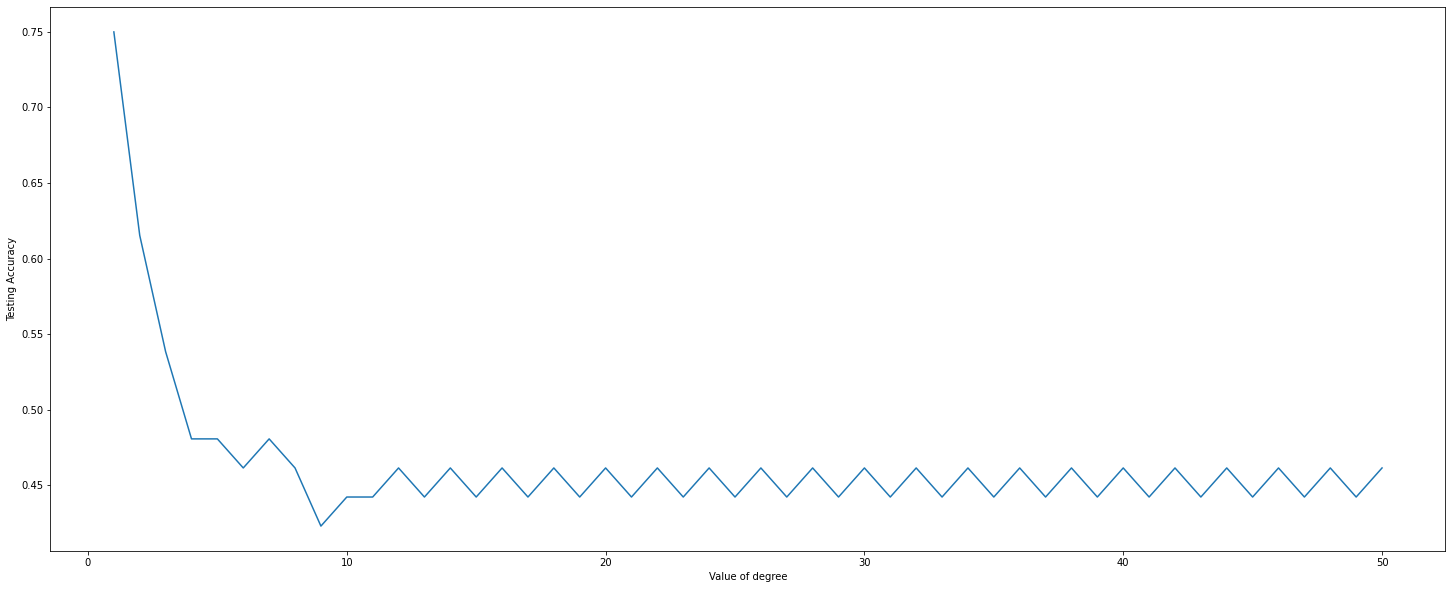

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
#plot the relationship between K and the testing accuracy
plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of degree')
plt.ylabel ('Testing Accuracy')

print("The best Degree:")
best_degree=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_degree)

In [40]:
from sklearn.svm import SVC
classifier = SVC(kernel = best, degree=best_degree,random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[19  4]
 [ 9 20]]
              precision    recall  f1-score   support

     Healthy       0.68      0.83      0.75        23
    Tinnitus       0.83      0.69      0.75        29

    accuracy                           0.75        52
   macro avg       0.76      0.76      0.75        52
weighted avg       0.76      0.75      0.75        52

Accurecy:  0.75
